In [165]:
import pandas as pd
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

In [166]:
data = pd.read_csv('C:\\Users\\nbpat\\Desktop\\ML Project\\communities-crime-full.csv', na_values=['?'])

In [167]:
data.shape

(1994, 128)

In [168]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [170]:
data[data.columns[1]].fillna(int(data[data.columns[1]].mean()),inplace=True)
data[data.columns[2]].fillna(int(data[data.columns[2]].mean()),inplace=True)
for i in data:
    if (data[i].dtypes!=object):
        data[i].fillna(data[i].mean(),inplace=True)
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,58.0,46188.0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.0,46188.0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.0,46188.0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
5,6,58.0,46188.0,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.14
6,44,7.0,41500.0,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
7,6,58.0,46188.0,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.55
8,21,58.0,46188.0,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.53
9,29,58.0,46188.0,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.15


In [171]:
data['highCrime'] = (data[data.columns[-1]]>0.1)
c = Counter()
c.update(data.highCrime)
print ("Positive HighCrime Instances: %.4f"%(c[True]/len(data.highCrime)))
print("Negative HighCrime Instances:  %.4f"%(c[False]/len(data.highCrime)))

Positive HighCrime Instances: 0.6274
Negative HighCrime Instances:  0.3726


In [172]:
# Encoding Field communityname
le = preprocessing.LabelEncoder()
data['communityname']=le.fit_transform(data.communityname)

# Normalizing Data
columns = data.columns[:-2]
Target = data[data.columns[-1]]
ViolentCrime = data[data.columns[-2]]
# data = normalize(data[data.columns[:-2]],axis=0)
data = pd.DataFrame(data,columns=columns)

In [173]:
X_data = data
y_target = Target
tree = DecisionTreeClassifier()
tree.fit(X_data,y_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [118]:
print("Accuracy on Training set: %.4f"% (tree.score(X_data,y_target)))
print("Precision on Training set: %.4f"% (precision(y_target,tree.predict(X_data))))
print("Recall on Training set: %.4f"% (recall(y_target,tree.predict(X_data))))

Accuracy on Training set: 1.0000
Precision on Training set: 1.0000
Recall on Training set: 1.0000


In [119]:
importance_tree = tree.feature_importances_
indices_tree = np.argsort(importance_tree)[::-1]
print("Top 10 Features used in classification.\n\n")
for f in range(0,10):
    print("%d. feature %d (%f)  ==> %s" % (f + 1, indices_tree[f], importance_tree[indices_tree[f]],data.columns[indices_tree[f]]))


Top 10 Features used in classification.


1. feature 49 (0.366602)  ==> PctKids2Par
2. feature 8 (0.086480)  ==> racePctWhite
3. feature 10 (0.049587)  ==> racePctHisp
4. feature 39 (0.019163)  ==> PctEmplManu
5. feature 97 (0.017247)  ==> PctBornSameState
6. feature 77 (0.016354)  ==> PctHousOccup
7. feature 76 (0.016283)  ==> HousVacant
8. feature 38 (0.014024)  ==> PctEmploy
9. feature 31 (0.013993)  ==> HispPerCap
10. feature 52 (0.013961)  ==> PctWorkMomYoungKids


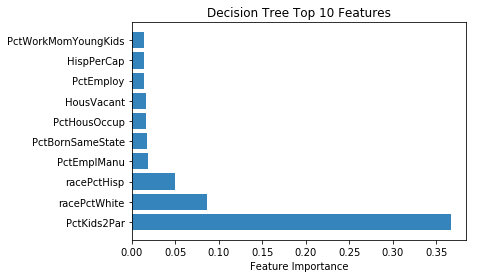

In [120]:
x_obj = []
for f in range(0,10):
    x_obj.append(data.columns[indices_tree[f]])
y_pos =np.arange(len(x_obj))
y_val =np.sort(importance_tree)[::-1][0:10]

plt.barh(y_pos,y_val,align='center',alpha=0.9)
plt.yticks(y_pos,x_obj)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Top 10 Features")

plt.show()


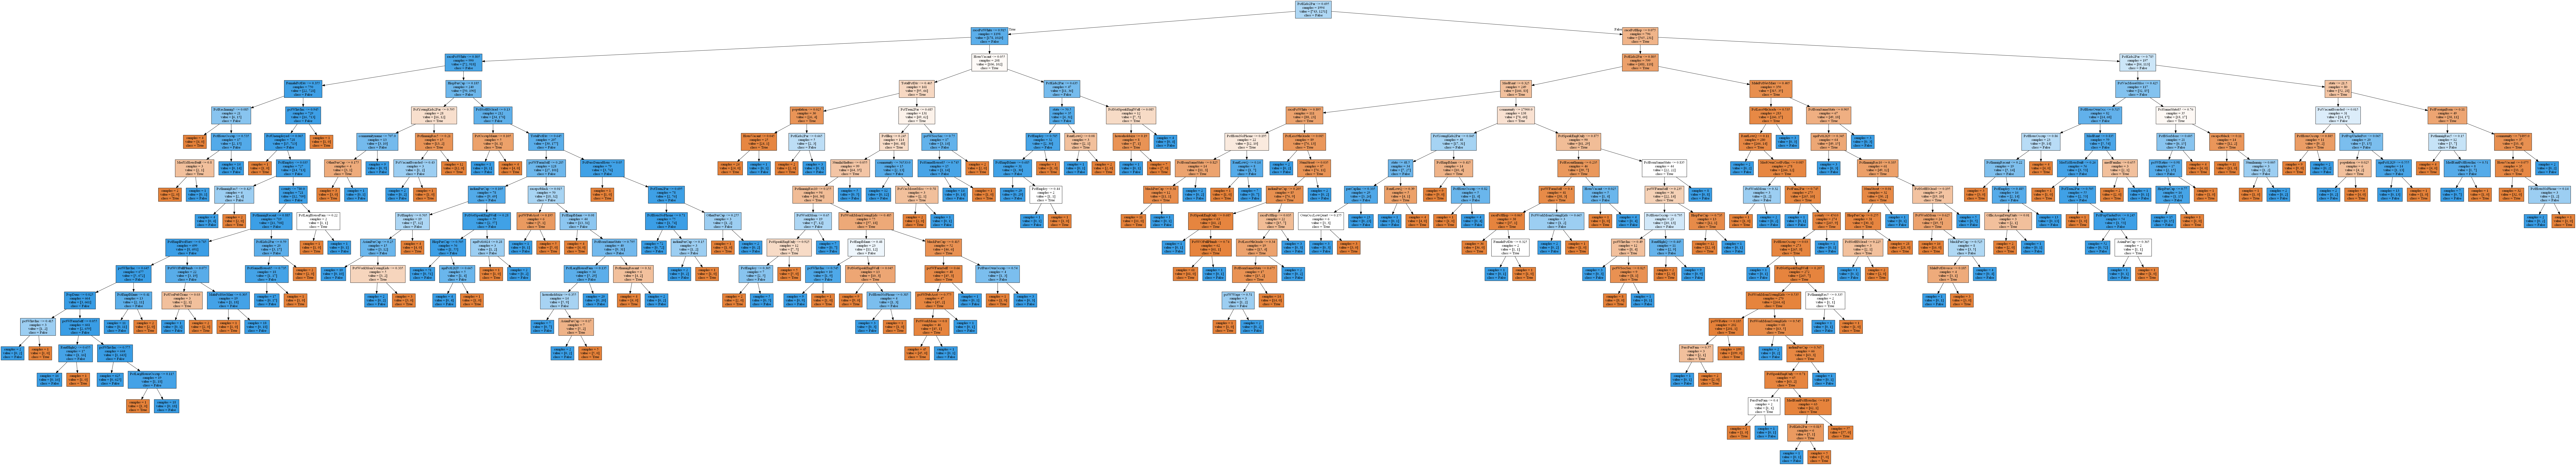

In [121]:
export_graphviz(tree, out_file="tree.dot", class_names=["True", "False"],
                feature_names=X_data.columns, impurity=False, filled=True)


graph = pydotplus.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')
Image(graph.create_png())

In [122]:
tree_accuracy=cross_val_score(tree,X_data,y_target,cv=10)
tree_precision = cross_val_score(tree,X_data,y_target,cv=10,scoring='precision')
tree_recall =cross_val_score(tree,X_data,y_target,cv=10,scoring='recall')

print("DecisionTreeClassifier Accuracy : %.4f (+/- %.4f)"% (tree_accuracy.mean(),tree_accuracy.std()*2))
print("DecisionTreeClassifier Precision: %.4f (+/- %.4f)"% (tree_precision.mean(),tree_precision.std()*2))
print("DecisionTreeClassifier Recall: %.4f (+/- %.4f)"% (tree_recall.mean(),tree_recall.std()*2))


DecisionTreeClassifier Accuracy : 0.7542 (+/- 0.0468)
DecisionTreeClassifier Precision: 0.8205 (+/- 0.0463)
DecisionTreeClassifier Recall: 0.7953 (+/- 0.0516)
